Analyzing Unemployment and participation rates across 51 states of America from 1976 to 2023, collecting data using FRED API.

The unemployment rate is a key economic indicator, representing the percentage of the total labor force that is unemployed but actively seeking employment. It is calculated by dividing the number of unemployed individuals by the total labor force and is often seasonally adjusted for accuracy.

Seasonal adjustment removes seasonal factors' average or anticipated effect from monthly, quarterly, or periodically collected data.

The data analyzed in this Exploratory Data Analysis project is seasonally adjusted.

Goals:

This analysis project uses time series data and aims to demonstrate how to handle, manipulate, and concatenate different time series as one data frame and use it for analysis.

This analysis project aims to demonstrate how to use fredapi as a data resource.

How to search and how to fetch data.

This analysis aims to study trends in unemployment and participation rates from 1976 to 2023.

This analysis aims to study the impacts of events like the Great Recession and COVID-19.

## <b>Note :</b> Most of the visualizations are performed using plotly.express hence are not visible in the notebook preview, to view the graphs, sign in and open the respective notebook in dev mode

In [1]:
# # Run the cell below only for the first time to install

# !pip install fredapi > /dev/null

In [2]:
# # importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fredapi import Fred
import plotly.express as px
sns.set_style('darkgrid')

In [3]:
# creating Fred object
fred_key = '1cab46db355630bbf9d30e61add494d7'
fred_obj = Fred(api_key = fred_key)

In [4]:
# # searching for available datasets using fred_obj.search()
# # the fread dataset contains different time series of economical data,
# # we are supposed to first search the series and then fetch the series.  

fred_obj.search('unemployment rate').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-01-18,2024-01-18,Unemployment Rate,1948-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 10:28:02-06:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-01-18,2024-01-18,Unemployment Rate,1948-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-01-05 07:45:29-06:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-01-18,2024-01-18,Unemployment Rate - Black or African American,1972-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-12 10:28:18-06:00,68,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-01-18,2024-01-18,Unemployment Rate - Black or African American,1972-01-01,2023-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-01-05 07:46:15-06:00,17,The series comes from the 'Current Population ...
NROU,NROU,2024-01-18,2024-01-18,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,63,"Starting with the July, 2021 report: An Update..."


In [5]:
unemp_search_df = fred_obj.search('unemployment rate', filter = ('frequency', 'Monthly'))
unemp_search_df = unemp_search_df.query('units == "Percent" and seasonal_adjustment == "Seasonally Adjusted"')
id_list = unemp_search_df['id'].tolist()
filtered_id_list = list(filter(lambda x : len(x) == 4, id_list))
unemp_search_df = unemp_search_df.loc[unemp_search_df['id'][filtered_id_list]]

In [6]:
unemp_search_df.shape

(52, 15)

In [7]:
unemp_search_df.isna()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
TXUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
NYUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
FLUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
OHUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
PAUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
MIUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
ALUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
NCUR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Data on fred server changes time to time, at the time I am re-executing this notebook it occurred to me that 'DSUR' is not present in the unemp_search_df, so it is recommended that in case that error occurs follow the commented instructions in the cell.

In [8]:
# # from the notes column it can be seen that it is extra row which needs to be removed

# final_search_unemp_df = unemp_search_df.drop(axis = 0, index = 'DSUR').copy()

# # comment the line above and execute the line below in case "['DSUR'] not present in axis" error occurs

final_search_unemp_df = unemp_search_df.copy()

In [9]:
final_search_unemp_df.shape

(52, 15)

In [10]:
# # fetching all the series 

series_df_list = []
for s_id in final_search_unemp_df.index:
    temp_series_df = fred_obj.get_series(s_id)
    temp_series_df = temp_series_df.to_frame(name = s_id)
    series_df_list.append(temp_series_df)

# # concatenating all the series in single data frame since all series have same dates as index
    
final_unemp_df = pd.concat(series_df_list, axis = 1)

In [11]:
# # renaming all the columns to actual state names

id_to_names_dict = final_search_unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

In [12]:
final_search_unemp_df.rename(id_to_names_dict, inplace = True)
final_unemp_df.rename(columns = id_to_names_dict, inplace = True)

In [13]:
final_unemp_df.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Ohio', 'Pennsylvania',
       'Michigan', 'Alabama', 'North Carolina', 'Colorado', 'Georgia',
       'Minnesota', 'Illinois', 'New Jersey', 'Arizona', 'Massachusetts',
       'Virginia', 'Wisconsin', 'Kentucky', 'Tennessee', 'Iowa', 'Indiana',
       'Washington', 'Maryland', 'South Carolina', 'Arkansas', 'West Virginia',
       'Utah', 'Missouri', 'Nevada', 'Louisiana', 'Alaska', 'Puerto Rico',
       'Oregon', 'Oklahoma', 'North Dakota', 'Connecticut', 'Kansas',
       'Montana', 'New Mexico', 'Hawaii', 'New Hampshire',
       'the District of Columbia', 'Mississippi', 'Idaho', 'Wyoming', 'Maine',
       'Nebraska', 'Vermont', 'South Dakota', 'Rhode Island', 'Delaware'],
      dtype='object')

In [14]:
# # finding NaN values
final_unemp_df.loc[final_unemp_df['Puerto Rico'].isna()]
# # these two values can be handled using mean

,California,Texas,New York,Florida,Ohio,Pennsylvania,Michigan,Alabama,North Carolina,Colorado,...,the District of Columbia,Mississippi,Idaho,Wyoming,Maine,Nebraska,Vermont,South Dakota,Rhode Island,Delaware
2020-03-01,5.5,5.0,4.2,4.0,4.7,4.9,3.7,3.4,4.0,3.3,...,5.7,5.9,2.7,4.9,3.2,4.4,2.5,2.4,3.6,5.0
2020-04-01,16.1,12.8,15.6,13.3,16.4,16.2,22.6,13.8,14.2,11.1,...,11.2,15.6,11.7,5.2,9.3,8.1,14.0,8.8,18.0,13.0


In [15]:
avg_rate = (final_unemp_df['Puerto Rico']['2020-02-01'] + final_unemp_df['Puerto Rico']['2020-05-01']) / 2
final_unemp_df['Puerto Rico']['2020-03-01'] = avg_rate
final_unemp_df['Puerto Rico']['2020-04-01'] = avg_rate

In [16]:
px_fig = px.line(final_unemp_df, markers = True, labels = {'value' : 'unemployment rate', 'index' : 'year'})
px_fig.show()

Insights from the visual

From the lineplot above it can be seen that in April 2020 all states show a spike in unemployment rate.

__

In [17]:
# # in the april of 2020 unemployment rate in all the states is showing spike
# # hence analysing april 2020 explicitly 

april_2020_df = final_unemp_df.loc[final_unemp_df.index == '2020-04-01'].T.copy(deep = True)

In [18]:
april_2020_df = april_2020_df.sort_values('2020-04-01')

In [19]:
px_fig = px.bar(data_frame = april_2020_df, labels = {'value' : 'unemployment rate', 'index' : 'states'})
px_fig.show()

Insights from the visual

April of 2020 was the month when strict lockdown was enforced across entire America, using the barplot we can deduce that Nevada is the most affected state by lockdown as most employment in Nevada is provided by hotels and casinos.

__

In [20]:
final_unemp_df.index = pd.to_datetime(final_unemp_df.index)

In [21]:
# plotting a heatmap to show trend in uneployment rate troughout the years
# calculating yearly mean rate and making yearly-unemployment-rate dataframe 
def to_yearly(df):
    frame_list = []
    month_list = []
    for year in range(1976, 2024):
        month_list.clear()
        for month in range(1, 12):
            month_str = str(year) + '-' + str(month) + '-01'
            month_list.append(month_str)

        temp_frame = round(df.loc[month_list].mean(), 2)
        temp_frame = temp_frame.to_frame().T
        frame_list.append(temp_frame)

    yearly_df = pd.concat(frame_list, axis = 0)

    # creating year list to map
    year_list = []
    for year in range(1976, 2024):
        year_list.append(str(year))

    yearly_df.index = year_list
    return yearly_df

In [22]:
yearly_unemp_df = to_yearly(final_unemp_df)

In [23]:
px.imshow(yearly_unemp_df, height = 900, width =1500)

Insights from the visual

The heatmap reflects yearly unployment rates, helping to visualize unemployment rate trends over the years. Apart from 2020, the pandemic year, unemployment rates were high around the year 2009 and also for the following few years due to the Great Recession, The increase can be seen across all the states in year 2009.

__

fetching participation rate data

In [24]:
participation_search_df = fred_obj.search('Labor Force Participation Rate for', filter = ('frequency', 'Monthly'))
participation_search_df = participation_search_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
participation_search_list = participation_search_df['id'].to_list()
final_participation_search_list = list(filter(lambda x : len(x) == 7, participation_search_list))

final_par_search_df = participation_search_df.loc[participation_search_df['id'][final_participation_search_list]]
final_par_search_df.drop(index = 'CIVPART', inplace = True)

par_series_list = []
for s_id in final_par_search_df.index:
    par_series_df = fred_obj.get_series(s_id)
    par_series_df = par_series_df.to_frame(name = s_id)
    par_series_list.append(par_series_df)

final_par_df = pd.concat(par_series_list, axis = 1)

In [25]:
print(f'{final_par_df.shape}, {final_unemp_df.shape}')

(575, 51), (575, 52)


unemployment data frame has one extra column which have to be removed

In [26]:
# # mapping column names to state names
# # the search dataframe also has the row 'CIVPART' whcih needs to be dropped

final_par_search_df = final_par_search_df.loc[final_par_search_df['id'] != 'CIVPART'].copy(deep = True)

# # creating names dictionary

id_to_names_dict = final_par_search_df['title'].str.replace('Labor Force Participation Rate for ', '') \
                    .to_dict()

In [27]:
final_par_search_df.rename(id_to_names_dict, axis = 0, inplace = True)
final_par_df.rename(id_to_names_dict, axis = 1, inplace = True)

# # renaming district of columbia

final_unemp_df.rename(columns = {'the District of Columbia' : 'District Of Columbia'}, inplace = True)

In [28]:
# # 'Puerto Rico' is extra column in unemployment dataframe

final_unemp_df.drop(columns= 'Puerto Rico', inplace= True)

In [29]:
print(f'{final_par_df.shape}, {final_unemp_df.shape}')

(575, 51), (575, 51)


both data frames now have exactly the same number of rows and columns

__

In [30]:
final_par_df.index = pd.to_datetime(final_par_df.index)

In [31]:
px_fig = px.line(final_par_df, markers = True)
px_fig.show()

Insights from the visual

Similar to the unemployment rate plot showing positive spike in April 2020, the participation rate plot shows negative spike in April 2020. Generally if these two events occur together it implies the existence of discouraged worker effect. But in this case these two events occur due to unprecedented pandemic situation.

__

In [32]:
yearly_par_df = to_yearly(final_par_df)

In [33]:
px.imshow(yearly_par_df, height = 900, width =1500)

Insights from the visuals

From the heatmap it is evident that in year 2020 there is drop of about 2 to 3 percent in participation rates across all the states. By looking at the heatmap, strip like pattern can easily be seen, from which it can be inferred that all the states show less variation in participation rates.

__

Subplot to visualize the the trends in participation rates and uneployment rates for each state from January 2020 to December 2022.

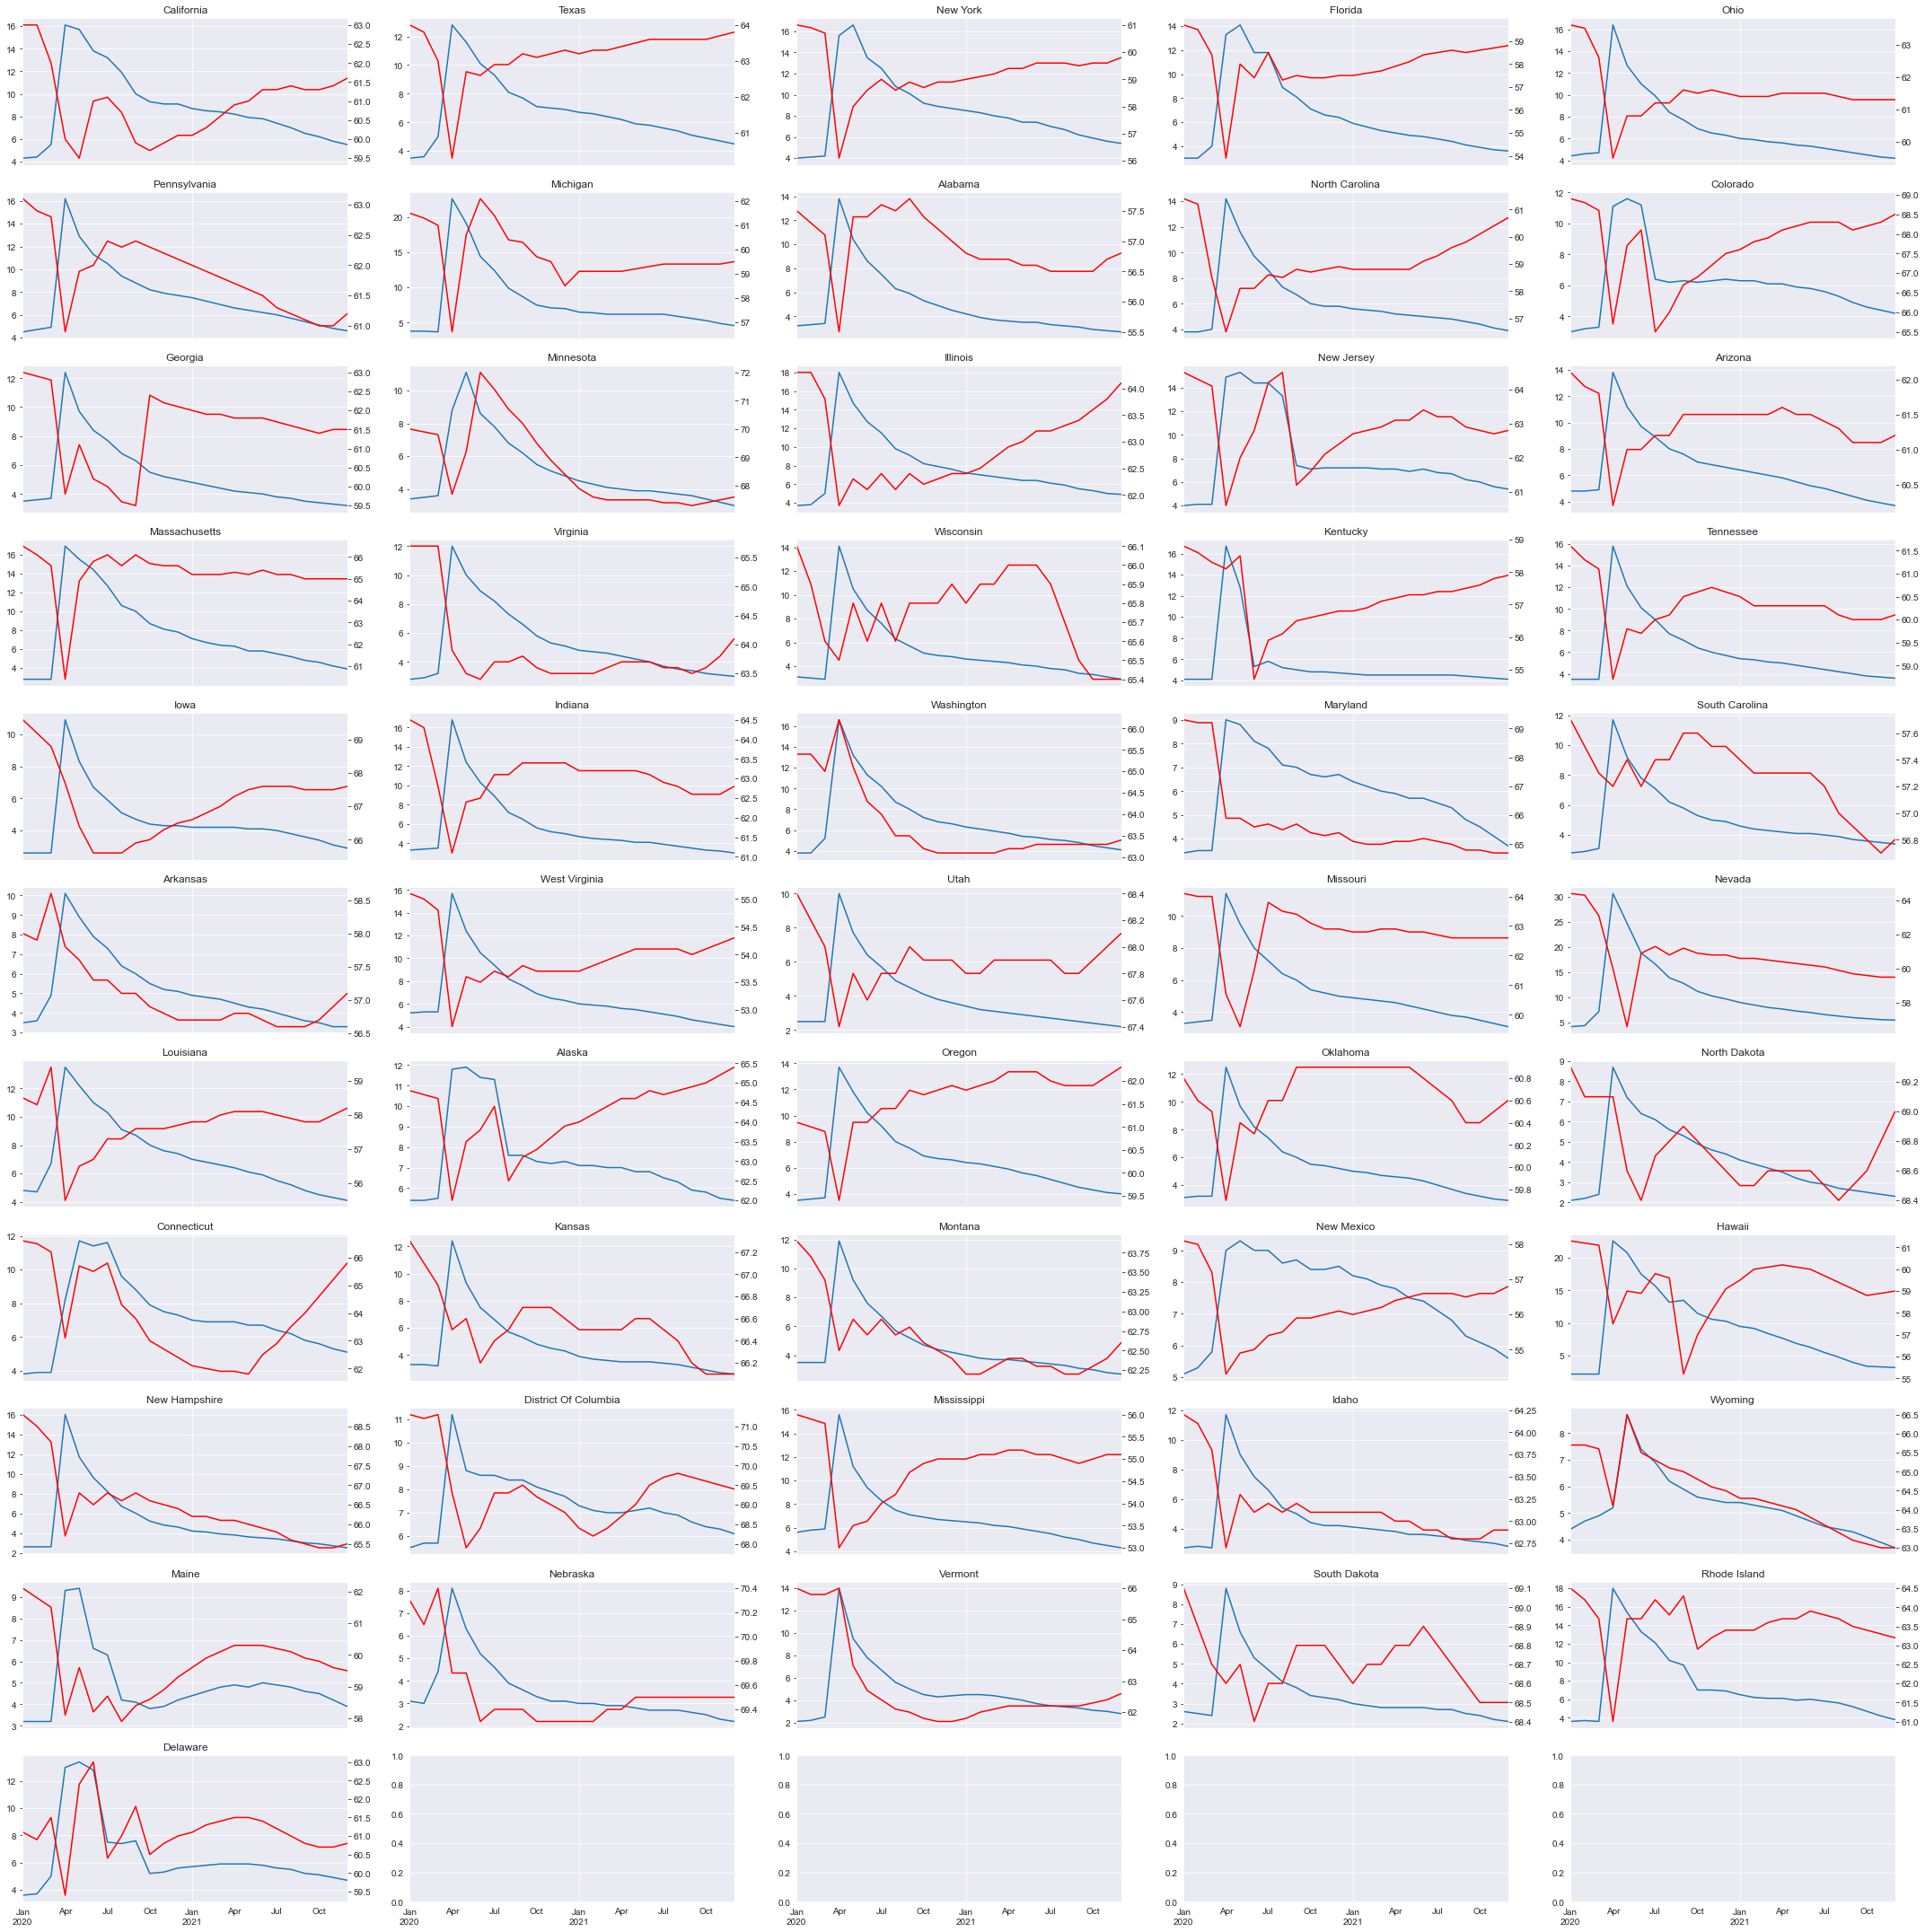

In [34]:
fig, axs = plt.subplots(11, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in final_unemp_df.columns:
    ax2 = axs[i].twinx()
    final_unemp_df.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    final_par_df.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color='r')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

Insights from the visuals

From the subplots above we can see the trends in participation rates(color = red) and unemployment rates(color = blue) for each state from year 2020 to 2022.

Left axis is for unemployment rates and right axis is for participation rates.

___________________________________________________________________________________________________________________________________________________________________________________

In [35]:
cal_series = pd.DataFrame(final_par_df['California'])
cal_series

,California
1976-01-01,62.6
1976-02-01,62.4
1976-03-01,62.2
1976-04-01,62.2
1976-05-01,62.3
...,...
2023-07-01,62.4
2023-08-01,62.4
2023-09-01,62.3
2023-10-01,62.3


In [36]:
exp_par_rate = cal_series['California'].mean()
exp_par_rate = round(exp_par_rate, 2)

In [37]:
cal_series['diff'] = cal_series['California'] - exp_par_rate

In [38]:
cal_series

,California,diff
1976-01-01,62.6,-2.32
1976-02-01,62.4,-2.52
1976-03-01,62.2,-2.72
1976-04-01,62.2,-2.72
1976-05-01,62.3,-2.62
...,...,...
2023-07-01,62.4,-2.52
2023-08-01,62.4,-2.52
2023-09-01,62.3,-2.62
2023-10-01,62.3,-2.62


In [39]:
cal_series  = cal_series.assign(diff_sq = lambda x : x['diff']**2)

In [40]:
cal_series = cal_series.assign(chi_value = lambda x : x['diff_sq'] / exp_par_rate)

In [41]:
chi_stat = cal_series['chi_value'].sum()
chi_stat

31.27412199630314

In [42]:
px.bar(cal_series['California'])

In [62]:

px.bar(data_frame=yearly_par_df, y = yearly_par_df['California'], x = yearly_par_df.index, height= 1000)

In [63]:
yearly_mean = yearly_par_df['California'].mean()
yearly_mean

64.91812499999999

In [64]:
sc = pd.DataFrame(yearly_par_df['California'])

In [65]:
sc = sc.assign(chi = lambda x : (x - yearly_mean)**2/yearly_mean)

In [66]:
sc


,California,chi
1976,62.51,0.089329
1977,63.69,0.023234
1978,65.07,0.000355
1979,65.55,0.006150
1980,65.64,0.008027
1981,65.40,0.003577
1982,65.96,0.016721
1983,65.73,0.010153
1984,65.80,0.011980
1985,66.01,0.018365


In [67]:
sc['chi'].sum()

2.56635771982016

we can not calculate/predict the degrees of freedom for this, hence test statistic for the fit of distribution can not be performed. 